#### About
Used car price prediction.
* Dataset - https://www.kaggle.com/datasets/harikrishnareddyb/used-car-price-predictions

In [1]:
#importing modules
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#reading data
df = pd.read_csv("/home/suraj/ClickUp/Jan-Feb/data/true_car_listings.csv")
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [3]:
#splitting the data into train and test
features = df['Price']
df = df.drop('Price',axis=1)
df.head()


,Year,Mileage,City,State,Vin,Make,Model
0,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [4]:
features.head()

0     8995
1    10888
2     8995
3    10999
4    14799
Name: Price, dtype: int64

In [5]:
X_train,X_test, y_train,y_test = train_test_split(df, features, test_size=0.2, random_state=55)


In [6]:
X_train

,Year,Mileage,City,State,Vin,Make,Model
763957,2013,55377,Springfield,OR,4T1BF1FK3DU290864,Toyota,CamrySE
783786,2015,18618,Norwood,MA,5YFBURHE5FP190670,Toyota,CorollaLE
818770,2015,30387,Blenheim,SC,3TMJU4GNXFM175198,Toyota,Tacoma2WD
471568,2005,149272,San Diego,CA,JNRAS08UX5X103401,INFINITI,FX35Base
763431,2014,36543,St. Louis,MO,4T1BF1FK3EU437749,Toyota,CamrySE
...,...,...,...,...,...,...,...
391101,2013,54390,Warrensburg,NY,1HGCR2F55DA239630,Honda,Accord
653853,2017,19237,Atlanta,GA,1N4AA6AP4HC371856,Nissan,MaximaS
82888,2016,11515,Augusta,GA,1G6KK5R61GU165195,Cadillac,CT6
4762,2015,48463,Hoffman Estates,IL,5J8TB4H56FL001192,Acura,RDXAWD


In [7]:
y_train

763957    15995
783786    14277
818770    28995
471568     7995
763431    15797
          ...  
391101    14490
653853    21499
82888     63000
4762      25969
389581    13995
Name: Price, Length: 681697, dtype: int64

#### Exploratory Data Analysis


In [8]:
#counting number of car models
X_train["Model"].value_counts()

Silverado         19944
Grand             13897
Accord            11624
F-1504WD          11333
Altima2.5          9063
                  ...  
F-150'07              1
LeSabreLimited        1
CenturyCustom         1
VeranoSedan           1
RegalBARGAIN          1
Name: Model, Length: 2667, dtype: int64

Text(0, 0.5, 'Count of cars')

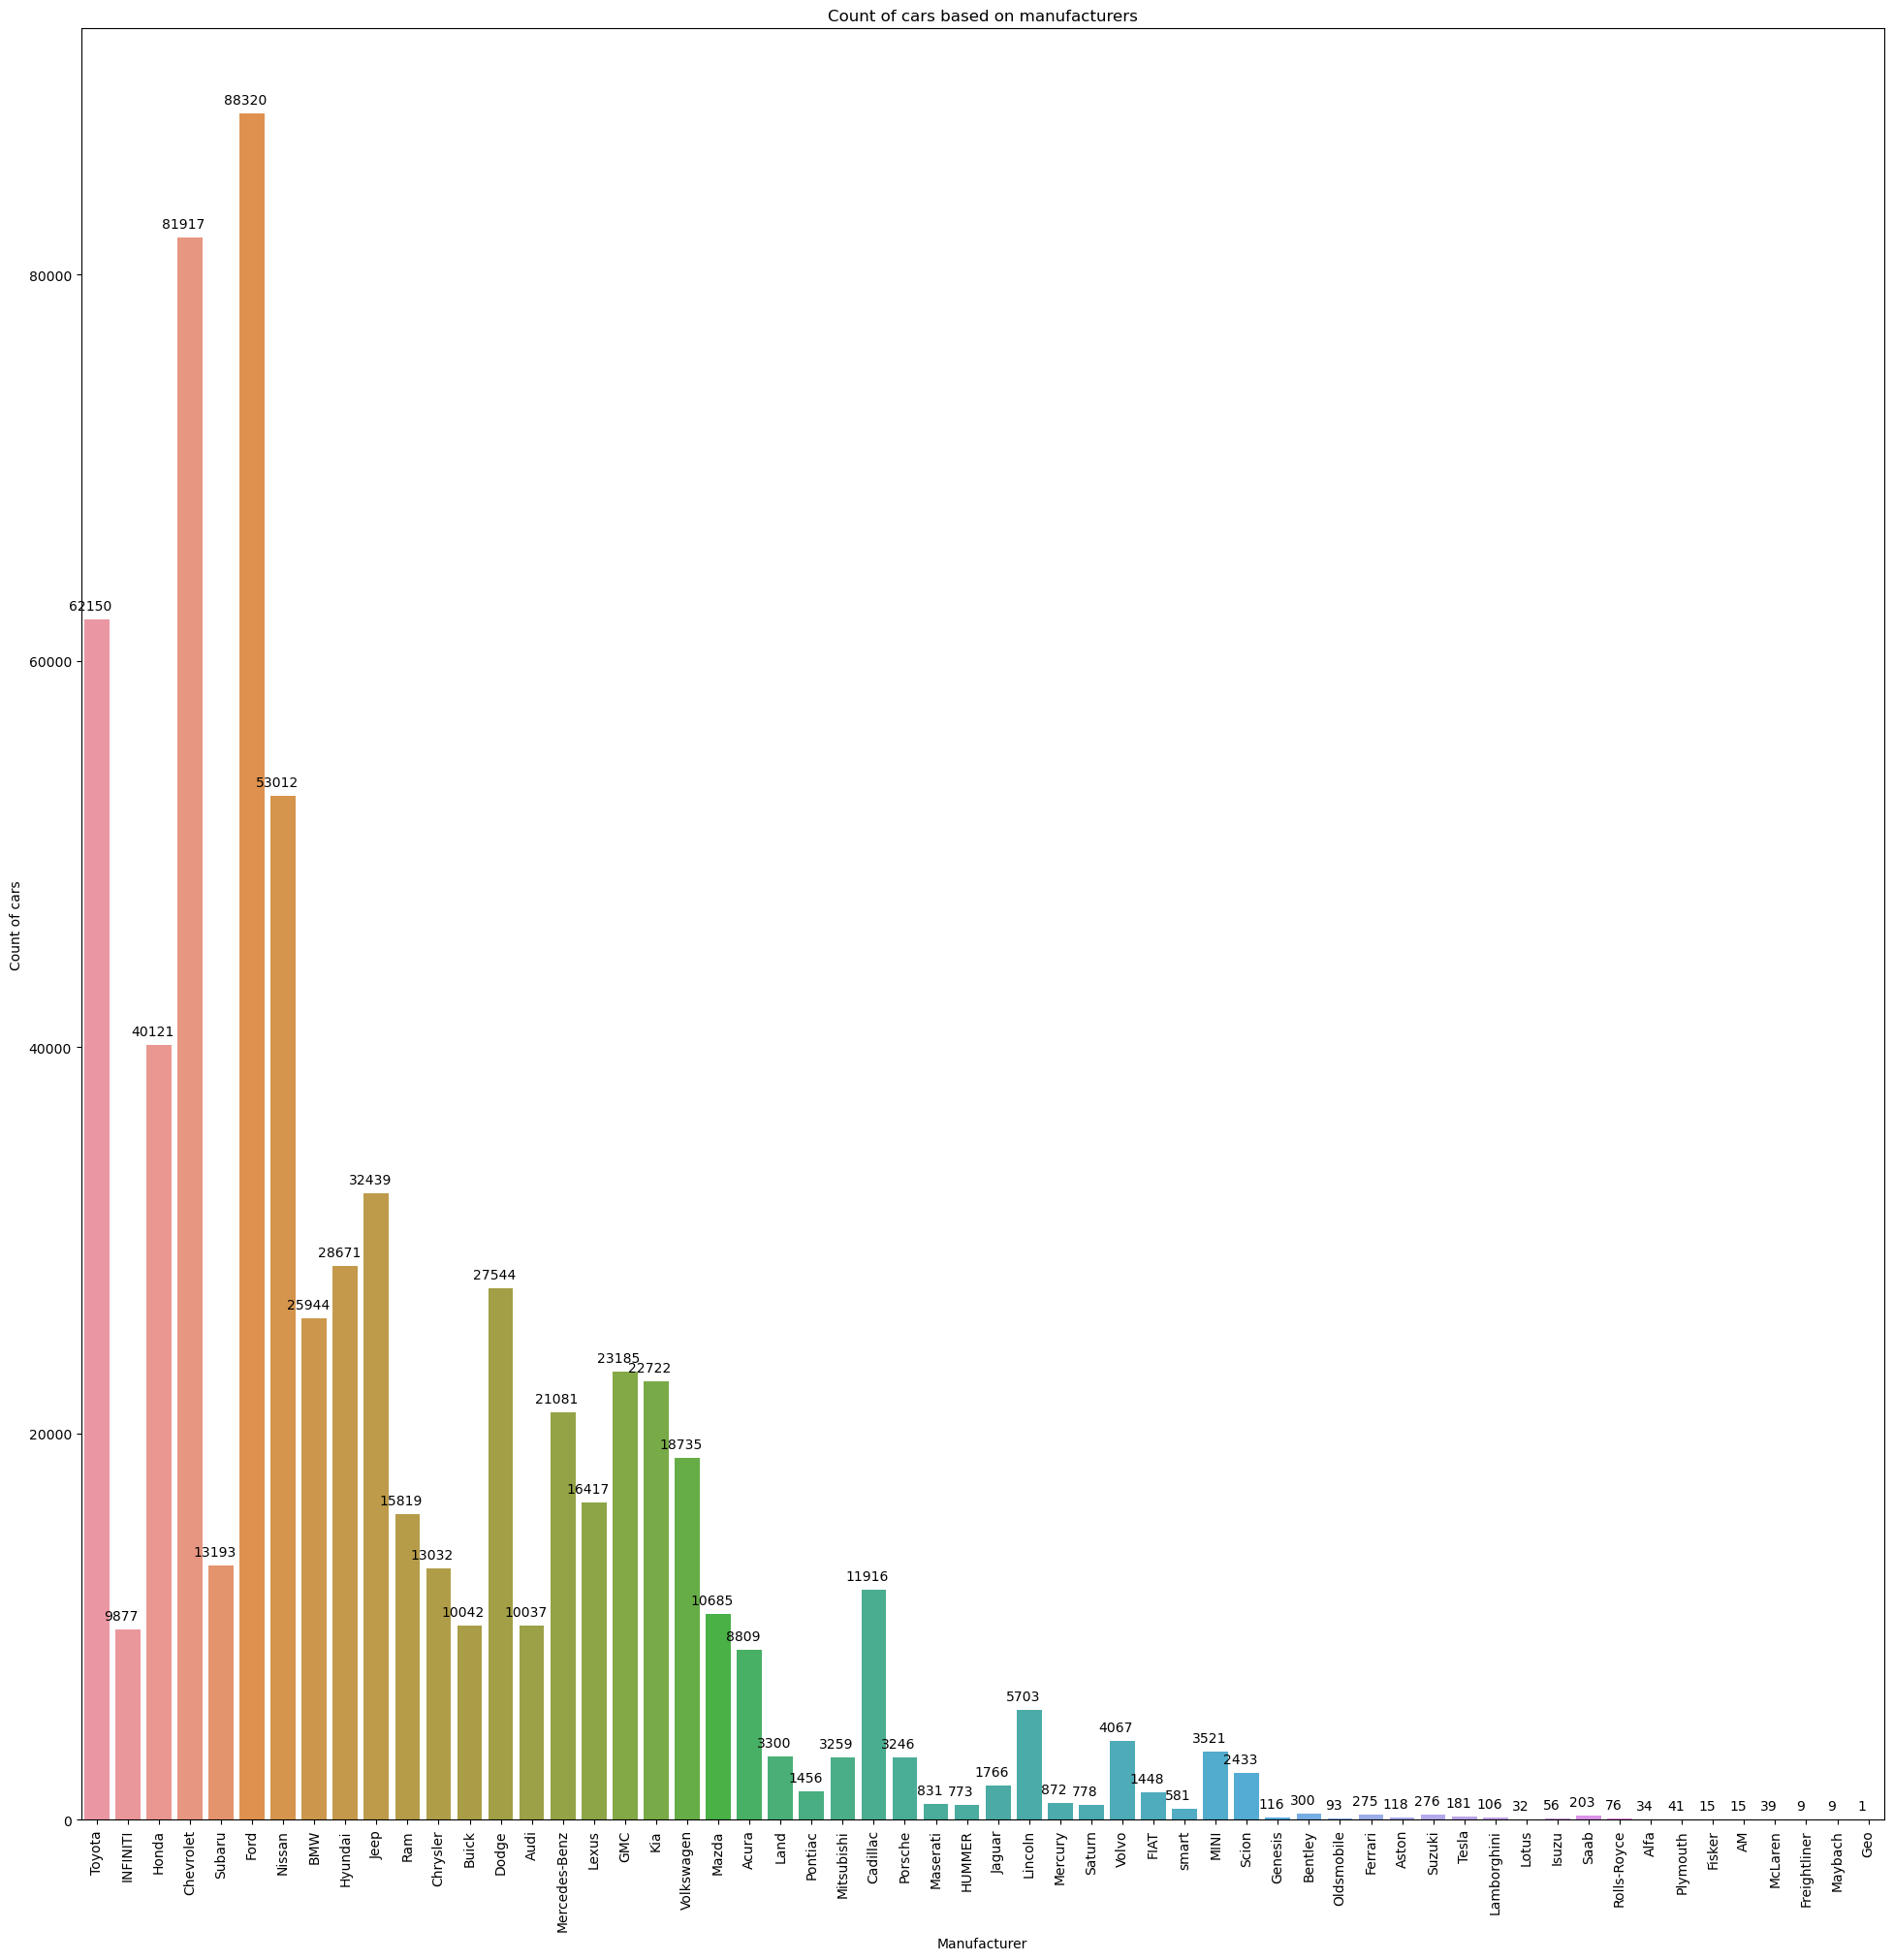

In [9]:
#exploring count of cars based on manufacture
plt.figure(figsize=(24,24))
plot = sns.countplot(x = 'Make', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 4.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 10),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")


In [10]:
# dropping city and state as calculated price should be location invariant
# similarly year and VIN as they are not of much significance
X_train.drop(["City","State","Year","Vin"],axis=1, inplace=True)
X_test.drop(["City","State","Year","Vin"],axis=1,inplace=True)

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
X_train["Mileage"]

763957     55377
783786     18618
818770     30387
471568    149272
763431     36543
           ...  
391101     54390
653853     19237
82888      11515
4762       48463
389581     30792
Name: Mileage, Length: 681697, dtype: int64

The value's varied and shall have effect on the price of the vehicle. Hence, Normalisation of data should be done prior training.

In [12]:
#creatind dummy columns for categorical columns
X_train = pd.get_dummies(X_train, columns = ["Make","Model"],drop_first=True)
X_test = pd.get_dummies(X_test, columns = ["Make","Model"],drop_first=True)

In [13]:
X_train = X_train.dropna()
X_test = X_test.dropna()

In [14]:
X_train

,Mileage,Make_Acura,Make_Alfa,Make_Aston,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,...,Model_tCManual,Model_xA4dr,Model_xB5dr,Model_xB686,Model_xBAutomatic,Model_xBManual,Model_xD,Model_xD5dr,Model_xDAutomatic,Model_xDManual
763957,55377,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783786,18618,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
818770,30387,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471568,149272,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
763431,36543,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391101,54390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653853,19237,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82888,11515,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4762,48463,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# sclaing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#fitting linear regression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)


In [ ]:
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

In [ ]:
#fitting randomforests
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)



In [ ]:
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)